In [1]:
%pylab inline
from yahoo_finance import Share
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as pltf
import numpy as np
import random as rd


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Start with one stock and the yahoo_finance function Share.
load = 'IBM'
security = Share(load)

In [ ]:
# Use yahoo_finance module function to pull in historical stock data of Open High
# Low and Closes.
# (Note this process was run once and **IS NOT REPEATED HERE** since it took ~2mn to get 
# all the historical data)
stocktable = security.get_historical('1960-04-01', '2016-04-20')

In [ ]:
# Save historical to CSV file. [ditto as for previous step - THIS STEP NOT REPEATED HERE]
stocktable.to_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load + '.csv')

In [3]:
# Read the historical data into a Pandas dataframel
stocktable = pd.read_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load + '.csv')
#/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/IBM.csv 

In [4]:
# Show the head. Note the index starts with the latest date.
# We will need to make the index start chronologically from the beginning day in the series
# so that plotting can go left to right in a chronological order. fyi the Unnamed column came
# natively with the yahoo.finance.get.historical function.
stocktable.head()

,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,0,146.110001,146.110001,2016-04-20,147.199997,144.000000,144.240005,IBM,6710500
1,1,144.000000,144.000000,2016-04-19,146.949997,142.610001,146.470001,IBM,13125200
2,2,152.529999,152.529999,2016-04-18,153.139999,151.490005,151.720001,IBM,5737700
3,3,151.720001,151.720001,2016-04-15,152.100006,150.960007,151.039993,IBM,3522400
4,4,151.160004,151.160004,2016-04-14,152.759995,150.380005,151.500000,IBM,3158400


In [5]:
# Create and seed the new index colum that will be used to reorder and resort the original dataframe.
stocktable['NewIndex'] = 0
stocktable.head(3)

,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,NewIndex
0,0,146.110001,146.110001,2016-04-20,147.199997,144.000000,144.240005,IBM,6710500,0
1,1,144.000000,144.000000,2016-04-19,146.949997,142.610001,146.470001,IBM,13125200,0
2,2,152.529999,152.529999,2016-04-18,153.139999,151.490005,151.720001,IBM,5737700,0


In [6]:
# set the NewIndex in reverse using the length of the file (in rows) so that the first record will be the 
# oldest date and progress forward from the top of the file. This will also enable charting which goes
# from left to right with earliest date to the left.
stocktable.NewIndex = max(stocktable.index) - range(len(stocktable))
stocktable.head()

,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,NewIndex
0,0,146.110001,146.110001,2016-04-20,147.199997,144.000000,144.240005,IBM,6710500,13668
1,1,144.000000,144.000000,2016-04-19,146.949997,142.610001,146.470001,IBM,13125200,13667
2,2,152.529999,152.529999,2016-04-18,153.139999,151.490005,151.720001,IBM,5737700,13666
3,3,151.720001,151.720001,2016-04-15,152.100006,150.960007,151.039993,IBM,3522400,13665
4,4,151.160004,151.160004,2016-04-14,152.759995,150.380005,151.500000,IBM,3158400,13664


In [7]:
# Check the end of the NewIndex dataframe to confirm operation that the earliest date is now the
# beginning of the NewIndex.

stocktable.tail()


,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,NewIndex
13664,13664,2.231525,549.500263,1962-01-08,559.500003,545.000267,559.500003,IBM,544000,4
13665,13665,2.274166,560.000253,1962-01-05,570.500243,558.999753,570.500243,IBM,363200,3
13666,13666,2.319852,571.250260,1962-01-04,576.999736,570.999742,576.999736,IBM,256000,2
13667,13667,2.343201,576.999736,1962-01-03,576.999736,572.000241,572.000241,IBM,288000,1
13668,13668,2.322898,572.000241,1962-01-02,578.499734,572.000241,578.499734,IBM,387200,0


In [8]:
# Set the new dataframe (stocktable2) and its index and permanently resort that index.

stocktable2 = stocktable.set_index(['NewIndex'])
stocktable2.sort_index(inplace=True)
stocktable2.head()


,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
NewIndex,,,,,,,,,
0,13668,2.322898,572.000241,1962-01-02,578.499734,572.000241,578.499734,IBM,387200
1,13667,2.343201,576.999736,1962-01-03,576.999736,572.000241,572.000241,IBM,288000
2,13666,2.319852,571.250260,1962-01-04,576.999736,570.999742,576.999736,IBM,256000
3,13665,2.274166,560.000253,1962-01-05,570.500243,558.999753,570.500243,IBM,363200
4,13664,2.231525,549.500263,1962-01-08,559.500003,545.000267,559.500003,IBM,544000


In [9]:
# Remove unwanted columns.

stocktable2 = stocktable2[['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj_Close']]
stocktable2.head(3)


,Date,Symbol,Open,High,Low,Close,Adj_Close
NewIndex,,,,,,,
0,1962-01-02,IBM,578.499734,578.499734,572.000241,572.000241,2.322898
1,1962-01-03,IBM,572.000241,576.999736,572.000241,576.999736,2.343201
2,1962-01-04,IBM,576.999736,576.999736,570.999742,571.250260,2.319852


In [10]:
# Define the functions that will need to be called to transform the historical Open, High and Lows
# into historically relevant prices based on the 'governing' Adj_Close values which provide a
# continuously adjusted price series over time unlike the existing Open, High and Lows which are 
# expressed to conform to the current day valuation levels of the stock.

def newlow(x):
    if x['Adj_Close'] != x['Close']:
        return x['Low'] / (x['Close'] / x['Adj_Close'])
    else:
        return x['Low']
    
def newopen(x):
    if x['Adj_Close'] != x['Close']:
        return x['Open'] / (x['Close'] / x['Adj_Close'])
    else:
        return x['Open']
    
def newhigh(x):
    if x['Adj_Close'] != x['Close']:
        return x['High'] / (x['Close'] / x['Adj_Close'])
    else:
        return x['High']


In [11]:
# Run these functions and apply them to new Open, High and Low colums (NOpen, NHigh, Nlow):

stocktable2['NOpen'] = stocktable2.apply(newopen, axis=1)
stocktable2['NHigh'] = stocktable2.apply(newhigh, axis=1)
stocktable2['NLow'] = stocktable2.apply(newlow, axis=1)


In [12]:
# Visually review that the new Open, High and Low columns have been correctly adjusted in light of 
# the Adj_Close price. You can see that the 500 level prices are now expressed in the historically 
# relevant 2 level prices which correspond to the historically relevant Adj_Close price.

stocktable2.head()

,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
0,1962-01-02,IBM,578.499734,578.499734,572.000241,572.000241,2.322898,2.349292,2.349292,2.322898
1,1962-01-03,IBM,572.000241,576.999736,572.000241,576.999736,2.343201,2.322898,2.343201,2.322898
2,1962-01-04,IBM,576.999736,576.999736,570.999742,571.250260,2.319852,2.343201,2.343201,2.318835
3,1962-01-05,IBM,570.500243,570.500243,558.999753,560.000253,2.274166,2.316807,2.316807,2.270103
4,1962-01-08,IBM,559.500003,559.500003,545.000267,549.500263,2.231525,2.272134,2.272134,2.213250


In [13]:
# Visually review and confirm that there were no changes made to current dates in the dataframe where no
# adjustment is called for, i.e. current dates of today.

stocktable2.tail(3)

,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
13666,2016-04-18,IBM,151.720001,153.139999,151.490005,152.529999,152.529999,151.720001,153.139999,151.490005
13667,2016-04-19,IBM,146.470001,146.949997,142.610001,144.000000,144.000000,146.470001,146.949997,142.610001
13668,2016-04-20,IBM,144.240005,147.199997,144.000000,146.110001,146.110001,144.240005,147.199997,144.000000


In [14]:
# Round all needed column prices to 2 decimal points for simplicity.

stocktable2['NLow'] = np.round(stocktable2['NLow'],2)
stocktable2['NHigh'] = np.round(stocktable2['NHigh'],2)
stocktable2['NOpen'] = np.round(stocktable2['NOpen'],2)
stocktable2['Adj_Close'] = np.round(stocktable2['Adj_Close'],2)
stocktable2.head()


,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
0,1962-01-02,IBM,578.499734,578.499734,572.000241,572.000241,2.32,2.35,2.35,2.32
1,1962-01-03,IBM,572.000241,576.999736,572.000241,576.999736,2.34,2.32,2.34,2.32
2,1962-01-04,IBM,576.999736,576.999736,570.999742,571.250260,2.32,2.34,2.34,2.32
3,1962-01-05,IBM,570.500243,570.500243,558.999753,560.000253,2.27,2.32,2.32,2.27
4,1962-01-08,IBM,559.500003,559.500003,545.000267,549.500263,2.23,2.27,2.27,2.21


In [15]:
# Confirm this on the tail too.

stocktable2.tail()


,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
13664,2016-04-14,IBM,151.500000,152.759995,150.380005,151.160004,151.16,151.50,152.76,150.38
13665,2016-04-15,IBM,151.039993,152.100006,150.960007,151.720001,151.72,151.04,152.10,150.96
13666,2016-04-18,IBM,151.720001,153.139999,151.490005,152.529999,152.53,151.72,153.14,151.49
13667,2016-04-19,IBM,146.470001,146.949997,142.610001,144.000000,144.00,146.47,146.95,142.61
13668,2016-04-20,IBM,144.240005,147.199997,144.000000,146.110001,146.11,144.24,147.20,144.00


In [16]:
# Reduce the dataframe's columns to only those that will be needed in the model.

stocktable2 = stocktable2[['Date', 'Symbol', 'NOpen', 'NHigh', 'NLow', 'Adj_Close']]
stocktable2.head(3)


,Date,Symbol,NOpen,NHigh,NLow,Adj_Close
NewIndex,,,,,,
0,1962-01-02,IBM,2.35,2.35,2.32,2.32
1,1962-01-03,IBM,2.32,2.34,2.32,2.34
2,1962-01-04,IBM,2.34,2.34,2.32,2.32


In [17]:
# Visually confirm the tail too.
stocktable2.tail(3)

,Date,Symbol,NOpen,NHigh,NLow,Adj_Close
NewIndex,,,,,,
13666,2016-04-18,IBM,151.72,153.14,151.49,152.53
13667,2016-04-19,IBM,146.47,146.95,142.61,144.00
13668,2016-04-20,IBM,144.24,147.20,144.00,146.11


In [ ]:
# Save the new re-indexed, re-sorted, tranformed and simplified dataset into a new file that will be called
# by the model. NOTE: This step was initially run but NOT RUN FOR THIS PRESENTATION as the file is already defined. 

load2 = 'IBM2'
stocktable2.to_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load2 + '.csv')


(<matplotlib.collections.LineCollection at 0x114fd3790>,
 <matplotlib.collections.LineCollection at 0x118ce2750>)

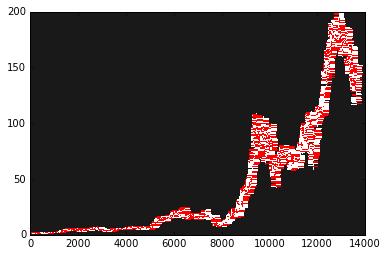

In [18]:
# Plot the entire time series.

ax1 = plt.subplot(1,1,1, axisbg='#191919')
pltf.plot_day_summary2_ohlc(ax1, stocktable2.NOpen, stocktable2.NHigh, stocktable2.NLow, stocktable2.Adj_Close, colorup='w', colordown='r')


In [19]:
#Sample a smaller range randomly to get a better more defined look at the charting.
s = rd.randrange(1000, 13000)
f = stocktable2[s:s+80]

(<matplotlib.collections.LineCollection at 0x118f44550>,
 <matplotlib.collections.LineCollection at 0x118f50c10>)

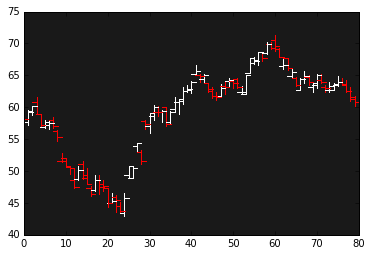

In [20]:
# Plot this 80 day interval
ax1 = plt.subplot(1,1,1, axisbg='#191919')
pltf.plot_day_summary2_ohlc(ax1, f.NOpen, f.NHigh, f.NLow, f.Adj_Close, colorup='w', colordown='r')

The next part of the model will need to determine all relative lows


In [ ]:
table1 = pd.DataFrame(df)

In [ ]:
stock = table1[['Symbol', 'Date','Open', 'High','Low', 'Close']]

In [ ]:
stock.head()

In [ ]:
newstock = stock.sort_index(ascending=False)

In [ ]:
newstock.head(2)

In [ ]:
#newstock.index = ['Date']
indexed_stock = newstock.set_index('Date')
#print(users.set_index('user_id').head())

In [ ]:
newstock.head()

In [ ]:
plt.plot(newstock['Low'])

In [ ]:
ax1 = plt.pyplot.subplot(1,1,1, axisbg='#191919')
pltf.plot_day_summary2_ohlc(ax1, newstock.Open, newstock.High, newstock.Low, newstock.Close, colorup='w', colordown='r')